# Opinion distribution evolution

Plot the evolution of the opinion distribution over time. Similar codes exist for other parameter values, but only the one without coherence features and with $\lambda=0.9$ made it into the paper, so only this notebook will be presented here in the public repository.

In [1]:
%matplotlib notebook

import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns


from matplotlib import rc
rc('text', usetex=True)

Paths

In [2]:
parent_path = os.path.join(os.getcwd(), "distribution_evolution")

path = os.path.join(os.getcwd(), "distribution_evolution\\L90SY")

if not os.path.exists(parent_path):
    os.mkdir(parent_path)
if not os.path.exists(path):
    os.mkdir(path)

In [3]:
l = '$\lambda$'
th = '$\\theta$'

In [4]:
# to store variances of distributions
# dimensions are: theta, gamma, kappa

var0 = np.full((9,9,9), np.nan)
var1000 = np.full((9,9,9), np.nan)

The code below creates a figure for all values of $\theta, \gamma, \kappa$ (even though we do not consider coherence features in this version of the model). The only figure we used in the paper is the separate one in the if-statement below. It takes a while to create all the figures, so comment out the main part of the loop if you only want to create the figure we used in the paper.

agents with opinion smaller -3:  2


<IPython.core.display.Javascript object>


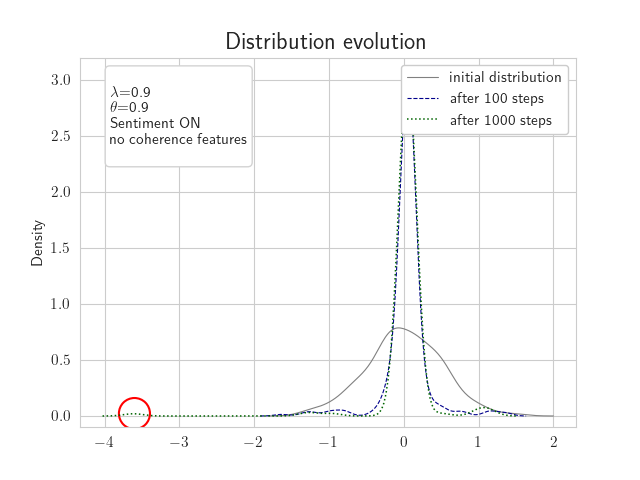

In [11]:
%%capture

# different lambda values
lambda_vals = ['05'] + [str(i) for i in range(10, 96, 5)]

sns.set_style('whitegrid')
               
periods = [0, 100, 1000]

# loop through all treatments, which start every 300 (nAgents) lines
for treatment, line_no in enumerate(range(0, 218700, 300)):
    theta = round(((treatment%9) / 10) + 0.1, 1)
    gamma = round((((treatment//9) % 9) / 10) + 0.1, 1)
    kappa = round(((treatment//81) / 10) + 0.1, 1)
    dists = list()
    for period in periods:
        opinions = list()
        with open(f'FIG1-DATA-NEW/FULL SENTIMENTS/K0G0T1-A300T1000M90S100-n8/results_SB_{period}.txt') as f:
            for i, line in enumerate(f):
                if i <= line_no:
                     continue
                elif line_no < i <= line_no+300:
                    opinions.append(float(line.split('\t')[1][:-1]))         
                else: break
        dists.append(np.array(opinions))
    
    plt.figure()
    plt.title('\LARGE{Distribution evolution}')
   
    sns.kdeplot(dists[0], linestyle='-', c='grey', lw=0.9, label='initial distribution')
    sns.kdeplot(dists[1], linestyle='--', c='grey', lw=0.9, label='after 100 steps')
    sns.kdeplot(dists[2], linestyle=':', c='grey', lw=1, label='after 1000 steps')


    text_str = f'''
                   {l}=0.9
                   {th}={theta}
                   Sentiment ON
                   no coherence features
                   '''

    ax = plt.gca()
    props = dict(boxstyle='round', facecolor='white', edgecolor='lightgrey', alpha=1)
    plt.text(0.06, 0.665, text_str, fontsize=11, transform=ax.transAxes, bbox=props)
    ax.tick_params(axis='both', labelsize=11)
    plt.ylabel("Density", fontsize=11)
    plt.legend(loc='upper right', fontsize=11, framealpha=1)

    # plt.savefig(f'distribution_evolution/L90SY/th{int(theta*10)}g{int(gamma*10)}k{int(kappa*10)}SY.eps')
    
    # save variances
    var0[int(theta*10) -1, int(gamma*10) -1, int(kappa*10) -1] = dists[0].var()
    var1000[int(theta*10) -1, int(gamma*10) -1, int(kappa*10)-1] = dists[-1].var()
    
    ########################################
    # figure with circle around fringe group
    ########################################
    
    if theta == 0.9 and gamma == 0.4 and kappa == 0.1:
        print("agents with opinion smaller -3: ",len(dists[2][dists[2]< -3]))
        plt.figure()
        plt.title('\LARGE{Distribution evolution}')

        sns.kdeplot(dists[0], linestyle='-', c='grey', lw=0.8, label='initial distribution')
        sns.kdeplot(dists[1], linestyle='--', c='darkblue', lw=0.8, label='after 100 steps')
        
        #plt.scatter

        sns.kdeplot(dists[2], linestyle=':', c='darkgreen', lw=1.1, label='after 1000 steps')


        text_str = f'''
                       {l}=0.9
                       {th}={theta}
                       Sentiment ON
                       no coherence features
                       '''

        ax = plt.gca()
        ax.scatter([-3.6], [0.022], edgecolor='red', linewidths=1.5, s=500, facecolors='none')#c='white')
        props = dict(boxstyle='round', facecolor='white', edgecolor='lightgrey', alpha=1)
        plt.text(0.06, 0.725, text_str, fontsize=11, transform=ax.transAxes, bbox=props)
        ax.tick_params(axis='both', labelsize=11)
        plt.ylim(-0.1, 3.2)
        plt.ylabel("Density", fontsize=11)
        plt.legend(loc='upper right', fontsize=11, framealpha=1)
        plt.savefig(f'distribution_evolution/L90SY/distribution_fringe_circle.eps')
        plt.savefig(f'distribution_evolution/L90SY/distribution_fringe_circle.png')
               

In [ ]:
dists[2]

In [6]:
print('average variance at gamma=0.9')
print('at time 0:')
print(var0[:,-1,:].mean())
print('\n')
print('at time 1000')
print(var1000[:,-1,:].mean())

average variance at gamma=0.9
at time 0:
nan


at time 1000
nan


In [7]:
print('average variance at gamma=0.1')
print('at time 0:')
print(var0[:,0,:].mean())
print('\n')
print('at time 1000')
print(var1000[:,0,:].mean())

average variance at gamma=0.1
at time 0:
nan


at time 1000
nan


In [8]:
print('average variance at kappa=0.9')
print('at time 0:')
print(var0[:,:,-1].mean())
print('\n')
print('at time 1000')
print(var1000[:,:,-1].mean())

average variance at kappa=0.9
at time 0:
nan


at time 1000
nan


In [9]:
print('average variance at kappa=0.1')
print('at time 0:')
print(var0[:,:,0].mean())
print('\n')
print('at time 1000')
print(var1000[:,:,0].mean())

average variance at kappa=0.1
at time 0:
nan


at time 1000
nan
